In [1]:
%pylab inline
%config InlineBackend.figure_format = 'retina'

Populating the interactive namespace from numpy and matplotlib


In [2]:
import arviz as az
import gbfit # To have access to waveform tools; this is safe to import as a module
from kde_contour import kdeplot_2d_clevels
import pandas as pd
import seaborn as sns
import warnings

sns.set_context('notebook')
sns.set_palette('colorblind')
sns.set_style('ticks')

In [3]:
fit = az.from_netcdf('testinj2.nc')
inj = genfromtxt('testinj2.dat', names=True)

Tobs = fit.constant_data.Tobs.values[0]
hbin = int(round(fit.constant_data.hbin.values[0]))

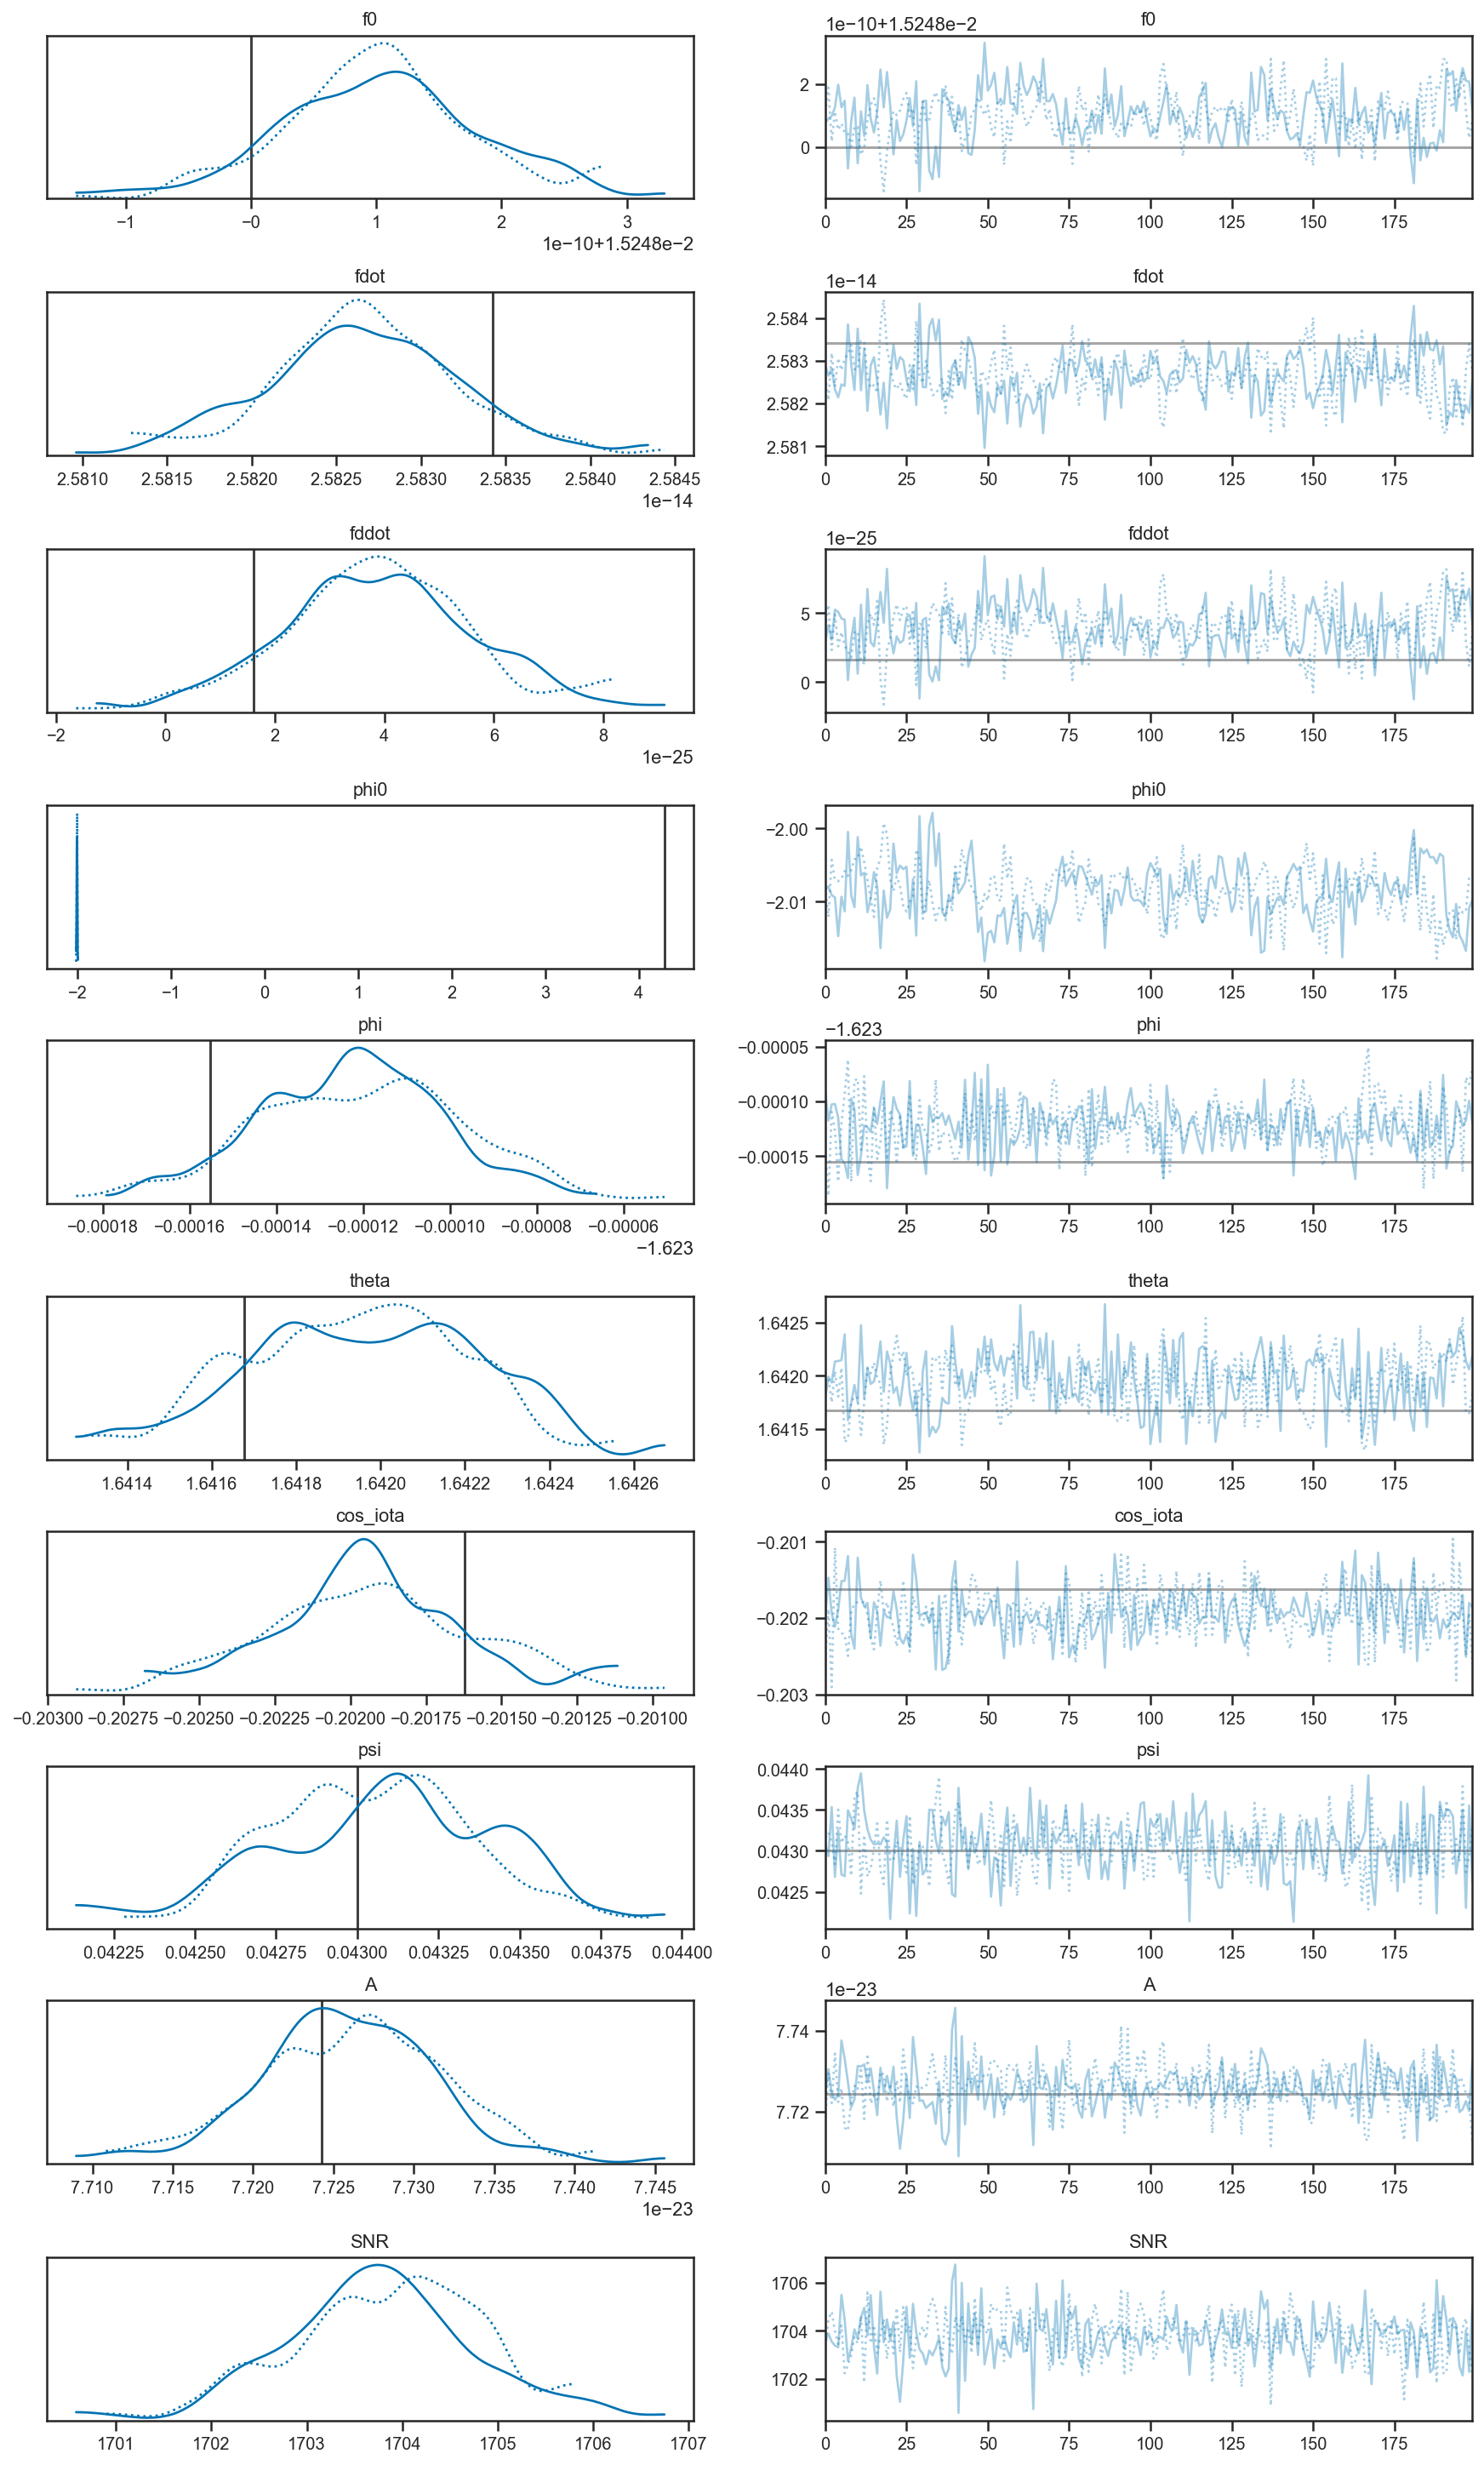

In [4]:
with warnings.catch_warnings():
    warnings.simplefilter('ignore')
    az.plot_trace(fit, compact=True, var_names=['f0', 'fdot', 'fddot', 'phi0', 'phi', 'theta', 'cos_iota', 'psi', 'A', 'SNR'],
                  lines=(('f0', {}, inj['f0']),
                         ('fdot', {}, inj['fdot']),
                         ('fddot', {}, inj['fddot']),
                         ('phi0', {}, inj['phi0']),
                         ('phi', {}, inj['phi']),
                         ('theta', {}, inj['theta']),
                         ('cos_iota', {}, inj['cos_iota']),
                         ('psi', {}, inj['psi']),
                         ('A', {}, inj['A'])),
                  coords={'chain': [1,2]})

In [5]:
4.66003 - 2*pi

-1.6231553071795863

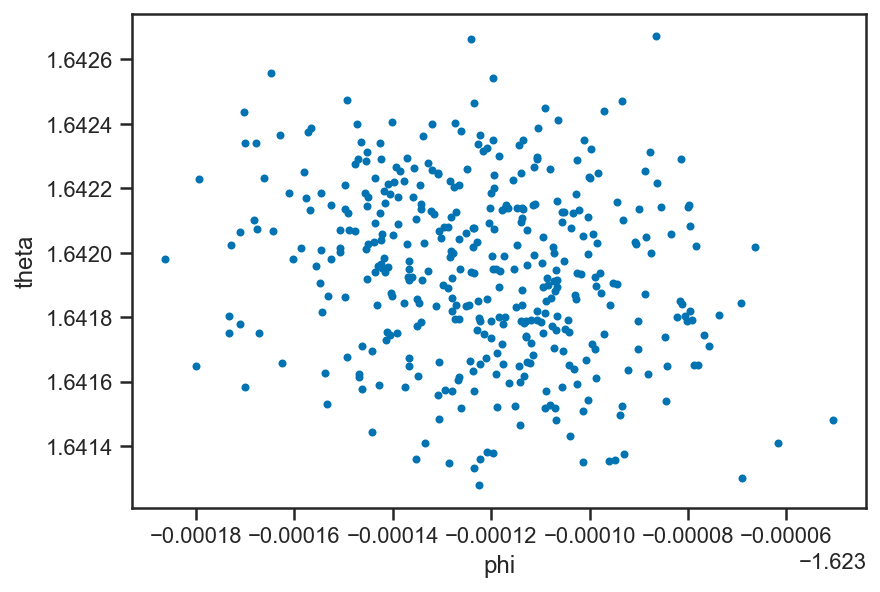

In [16]:
az.plot_pair(fit, var_names=['phi', 'theta'], coords={'chain': [1,2]})

/Users/wfarr/Code/GBPyro/kde_contour.py:28: UserWarning: The following kwargs were not used by contour: 'label', 'color'
  ax.contour(XS, YS, ZS, levels=l, **kwargs)


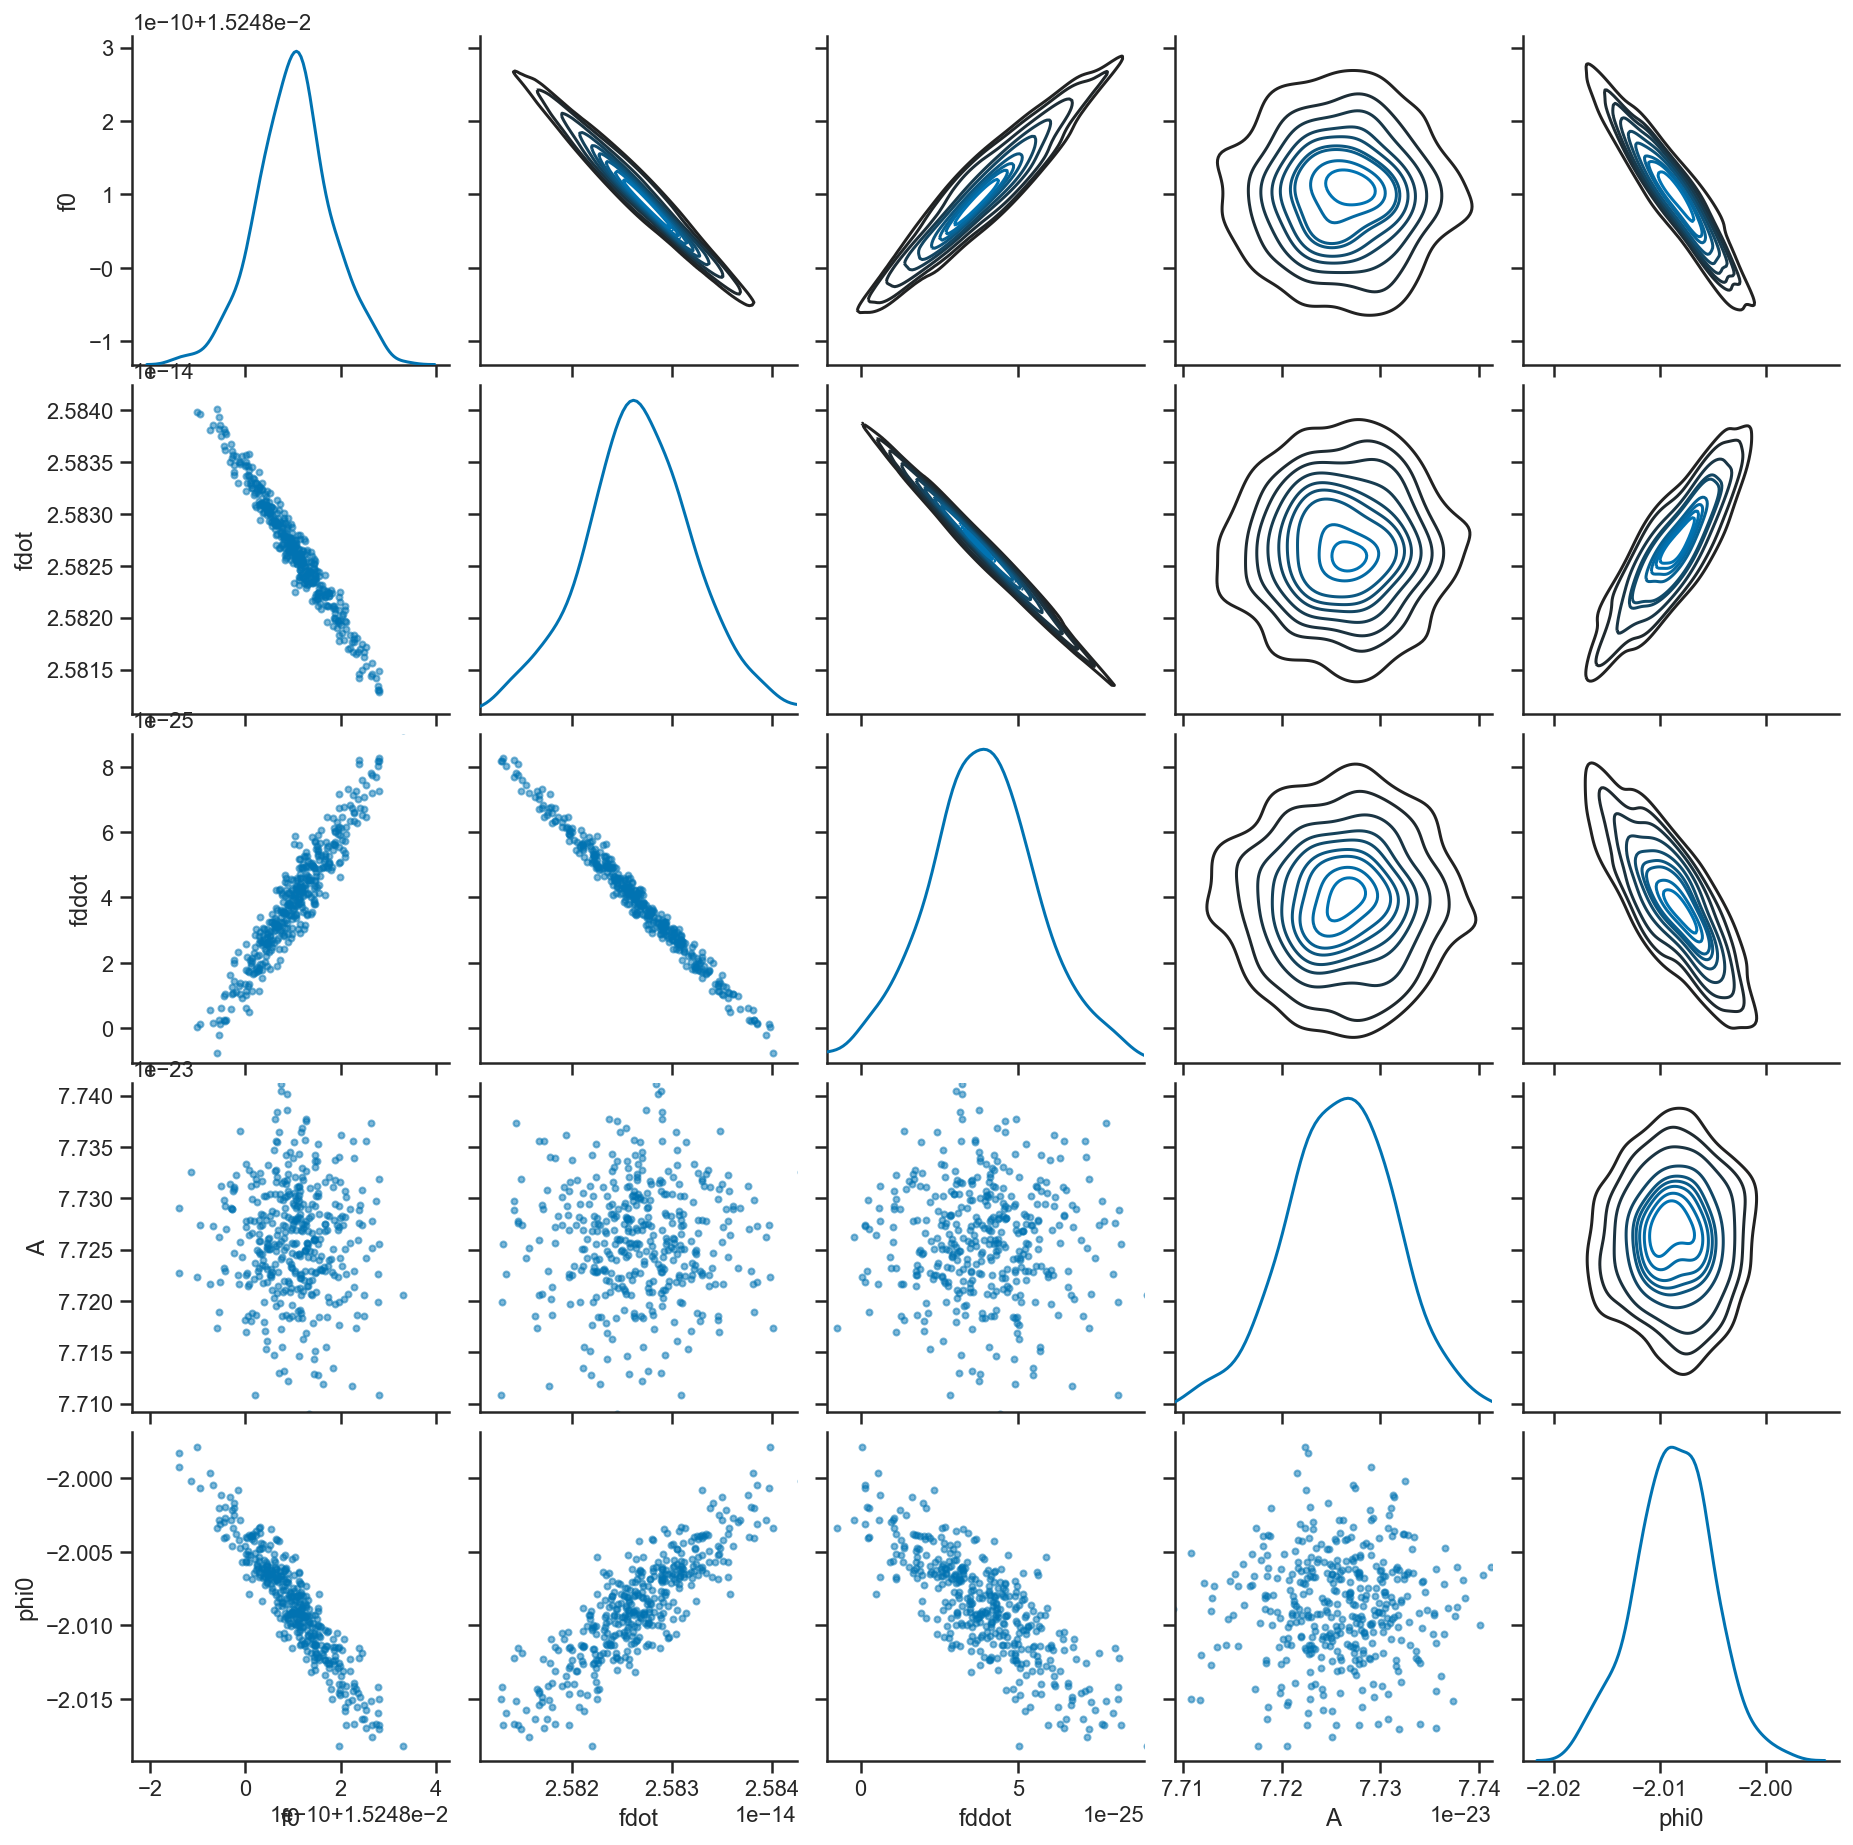

In [17]:
m = {}
for k in ['f0', 'fdot', 'fddot', 'A', 'phi0']:
    m[k] = fit.posterior[k].values[[1,2],:].flatten()
df = pd.DataFrame(m)
g = sns.PairGrid(df, diag_sharey=False)
g.map_diag(sns.kdeplot)
g.map_upper(kdeplot_2d_clevels)
g.map_lower(scatter, marker='.', alpha=0.5)

Text(0.5, 0, '$f$ ($\\mathrm{Hz}$)')

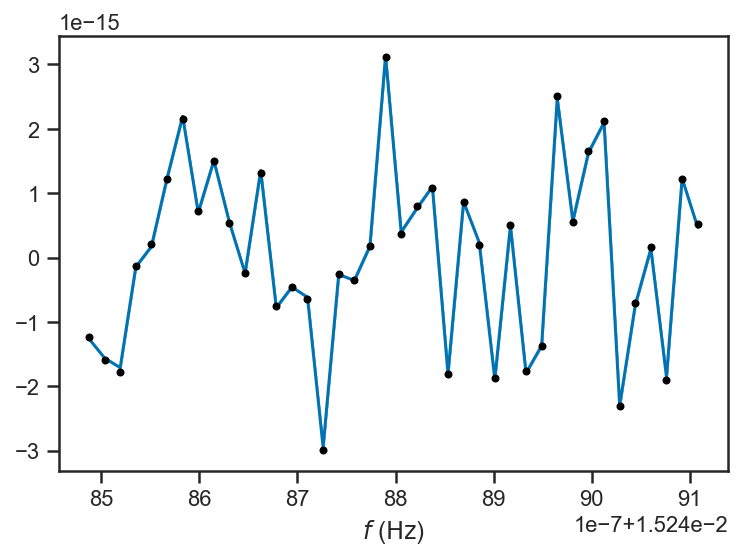

In [19]:
Ad = concatenate((fit.constant_data.A_re_data.values[-20:], fit.constant_data.A_re_data.values[:20]))
A = concatenate((fit.posterior.A_re.values[[1,2],:,-20:], fit.posterior.A_re.values[[1,2],:,:20]), axis=2)

fs = arange(-20, 20)/Tobs + hbin/Tobs

l, = plot(fs, median(A, axis=(0,1)))
fill_between(fs, percentile(A, 84, axis=(0,1)), percentile(A, 16, axis=(0,1)), alpha=0.25, color=l.get_color())
fill_between(fs, percentile(A, 97.5, axis=(0,1)), percentile(A, 2.5, axis=(0,1)), alpha=0.25, color=l.get_color())

errorbar(fs, Ad, yerr=sqrt(2*pi*1e7*gbfit.Sn(1e-3)/4), color='k', fmt='.')

xlabel(r'$f$ ($\mathrm{Hz}$)')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x134045dd0>,
      dtype=object)

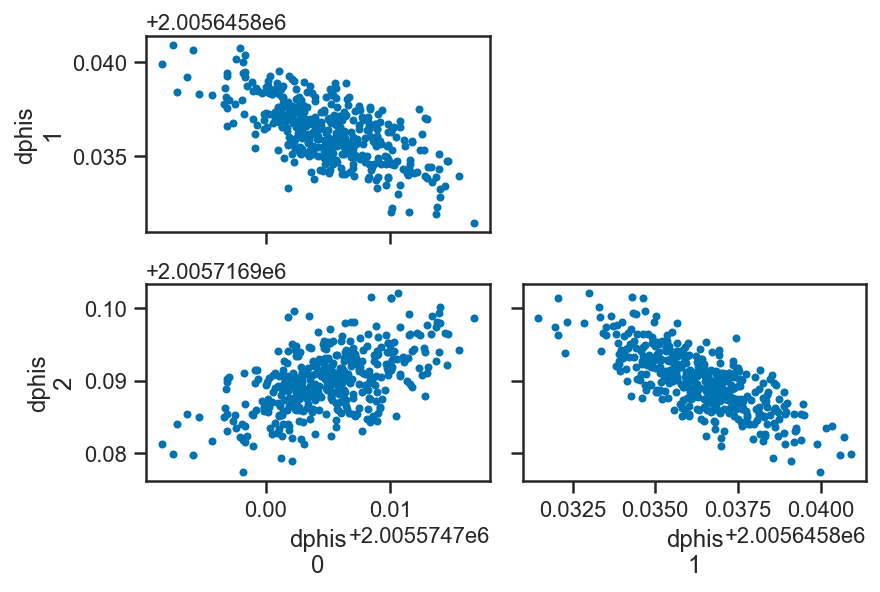

In [20]:
az.plot_pair(fit, var_names=['dphis'], coords={'chain': [1,2]})

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x12db079d0>,
      dtype=object)

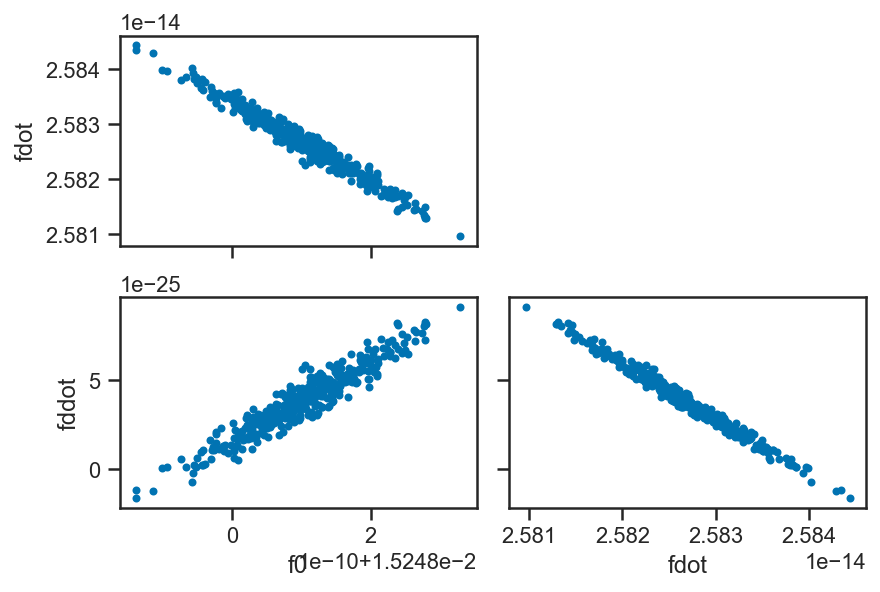

In [21]:
az.plot_pair(fit, var_names=['f0', 'fdot', 'fddot'], coords={'chain': [1,2]})

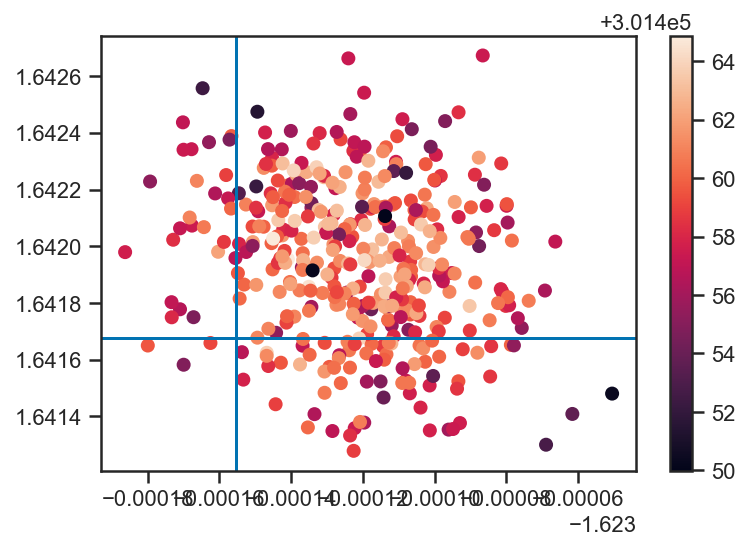

In [22]:
scatter(fit.posterior.phi.values[[1,2],:], fit.posterior.theta.values[[1,2],:], c=fit.sample_stats.lp.values[[1,2],:])
axhline(inj['theta'])
axvline(inj['phi'])
colorbar()